### Analytical Calculation of Output Distribution (1Dimension case)
#### By Irene Virdis

Given the exponential random distribution $f_X (x)$, we want to calculate the output distribution $f_Y (y)$ through the selected function $Y=g(X)$ of the random variable X.

\begin{equation}\label{eq:input}
f_X (x)  = \lambda \cdot e^{(-\lambda \cdot x) }, x\ge0, \lambda>0 ;\\
Y = g(X) = 3\cdot x +2.5
\end{equation}

The probability density function for the linear case has a well known form:

$f_Y (y) = \frac{1}{|a|}f_X (\frac{y-b}{a})$ if $(y-b)\geq 0 $, where $a$ and $b$ are defined by $Y = aX+b$

And for the case under study it can be written as follows:

$f_Y (y) = \frac{\lambda}{|a|}e^{-\lambda (y-b)/a}$ when $\frac{y-b}{a}\geq 0 \rightarrow y\geq 2.5$


The plot of input and output distribution has been reported in the pictures below, with the Python code used to generate them.

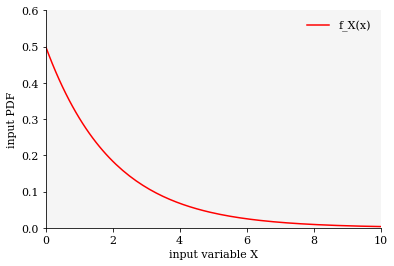

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from equadratures import *

#--------------------------------------------------#
#       plot of distributions
#--------------------------------------------------#
y = np.linspace(0,100,1000)
x = np.linspace(0,100,1000)
#-----------------------------------------------------------#

a = 3
b = 2.5

def blackbox(x):
    
    return a*x+b



lambdaa = 0.5
f_y = np.zeros((1000,1))
y_i = blackbox(x) 
f_x = np.zeros((1000,1))

for i in range(0,1000):
    #f_y[i] = (lambdaa/(y_i[i]**2))*(exp(-lambdaa/y_i[i]))
    f_y[i] = (lambdaa/abs(a) )*exp(-lambdaa*(y_i[i]-b)/a)
    f_x[i] = lambdaa*exp(-lambdaa*x[i]) 

plt.figure()
plt.grid()
plt.plot(x,f_x,'r-',label='f_X(x)')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,0.6])
plt.xlabel('input variable X')
plt.ylabel('input PDF')
plt.show()

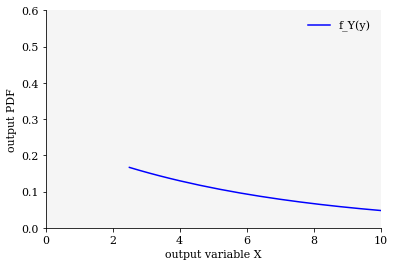

In [9]:
plt.figure()
plt.grid()
plt.plot(y_i,f_y,'b-', label='f_Y(y)')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,0.6])
plt.xlabel('output variable X')
plt.ylabel('output PDF')
plt.show()

#### Mean and Variance of output distribution

The mean and the variance of the output distribution can be calculed with the analytical form and by means of Monte Carlo method: the pyhon script used to this aim has been reported as follows:

In [10]:
# MonteCarlo

N = 1099000
A = 0.5  # shape factor lambda
B = 1/A
xi = np.random.exponential(B,(N,1))
yi = evalfunction(np.reshape(xi, (N,1)), blackbox)
print 'Monte Carlo:'
print np.mean(yi), np.var(yi)

Monte Carlo:
8.494916614249338 35.87336069570201


For the analytical solution:

$E[Y] = \int_{2.5}^{\infty}y e^{-\lambda(y-b)/a} dy = - e^{(\lambda(y-b)/a))} (y+ \frac{a}{\lambda}) |_{2.5} ^\infty$

$var(Y) = \int_{2.5}^{\infty}(y-E[x])^2 e^{-\lambda(y-b)/a} dy  $

By solving the integrals and sobstituing the limits we obtain:
    $E[Y] = 8.5$ and $var(Y) = 36$

### Numerical Solution with Effective Quadrature

Mean and variance of output distributions have been calculated using Effective Quadrature code: the parameters which characterize the input distribution have been reported as arguments of class $\textit{Parameter}$:

- order: number of points used between lower and upper values of interval
- shape parameter A = it represents the $\lambda$ of  an exponential distribution, in this case $\lambda =0.5$ 

In [5]:
xo = Parameter(order=5, distribution='Exponential',lower=0.0, upper=500, shape_parameter_A=0.5) 

myBasis = Basis('Tensor')
myPoly = Polyint([xo], myBasis)
myPoly.computeCoefficients(blackbox)
myStats = myPoly.getStatistics()
print 'Effective Quadratures'
print 'mean:', myStats.mean, 'variance:', myStats.variance


Effective Quadratures
mean: 8.2947179197 variance: 29.855650294
